In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

%load_ext autoreload
%autoreload 2

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

# Let's import the hopf model
from neurolib.models.hopf import HopfModel

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

# Single node simulation

In [3]:
hopf = HopfModel()
hopf.params['duration'] = 1.0*1000
hopf.params['sigma_ou'] = 0.03

hopf.run()

Text(0, 0.5, 'Activity')

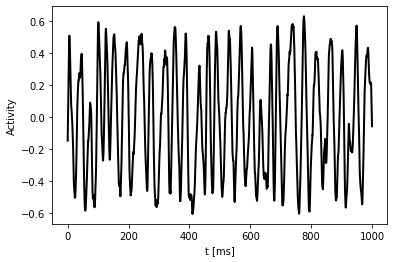

In [4]:
plt.plot(hopf.t, hopf.x.T, c='k', lw = 2)
# alternatively plot the results in the xarray:
# plt.plot(hopfModel.xr[0, 0].time, hopfModel.xr[0, 0].values)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

## Bifurcation diagram

In [23]:
hopf = HopfModel()
hopf.params['duration'] = 2.0*1000

In [24]:
max_x = []
min_x = []
# these are the different input values that we want to scan
a_s = np.linspace(-2, 2, 50)
for a in a_s:
    hopf.params['a'] = a
    hopf.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_x.append(np.max(hopf.x[0, -int(1000/hopf.params['dt']):]))
    min_x.append(np.min(hopf.x[0, -int(1000/hopf.params['dt']):]))

Text(0, 0.5, 'Min / max x')

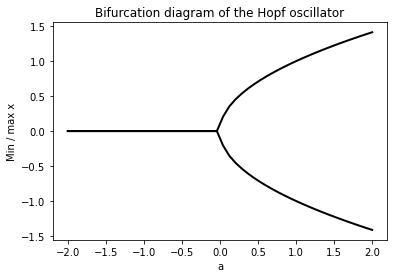

In [25]:
plt.plot(a_s, max_x, c='k', lw = 2)
plt.plot(a_s, min_x, c='k', lw = 2)
plt.title("Bifurcation diagram of the Hopf oscillator")
plt.xlabel("a")
plt.ylabel("Min / max x")

# Brain network

In [8]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [9]:
hopf = HopfModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [10]:
hopf.params['w'] = 1.0
hopf.params['signalV'] = 0
hopf.params['duration'] = 20 * 1000 
hopf.params['sigma_ou'] = 0.14
hopf.params['K_gl'] = 0.6

hopf.run(chunkwise=True)

Text(0.5, 0, 't [ms]')

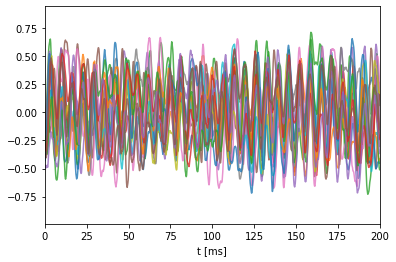

In [11]:
plt.plot(hopf.t, hopf.x[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

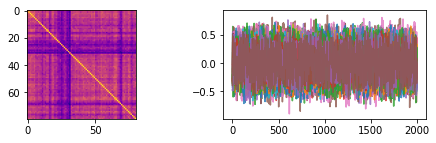

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(hopf.x[:, -10000:]))
axs[1].plot(hopf.t, hopf.x[::5, :].T, alpha=0.8);

In [13]:
scores = [func.matrix_correlation(func.fc(hopf.x[:, -int(5000/hopf.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['0.48', '0.63', '0.48', '0.6', '0.51', '0.51', '0.66']
Mean FC/FC correlation: 0.55
